In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

df = pd.read_json('../data/cleaned_data.json')

df = df[~df['genre'].isin(['Unknown'])]

df['genre'] = df['genre'].str.split(', ')
df_exploded = df.explode('genre')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\igoro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


***Genre and Rating analysis***

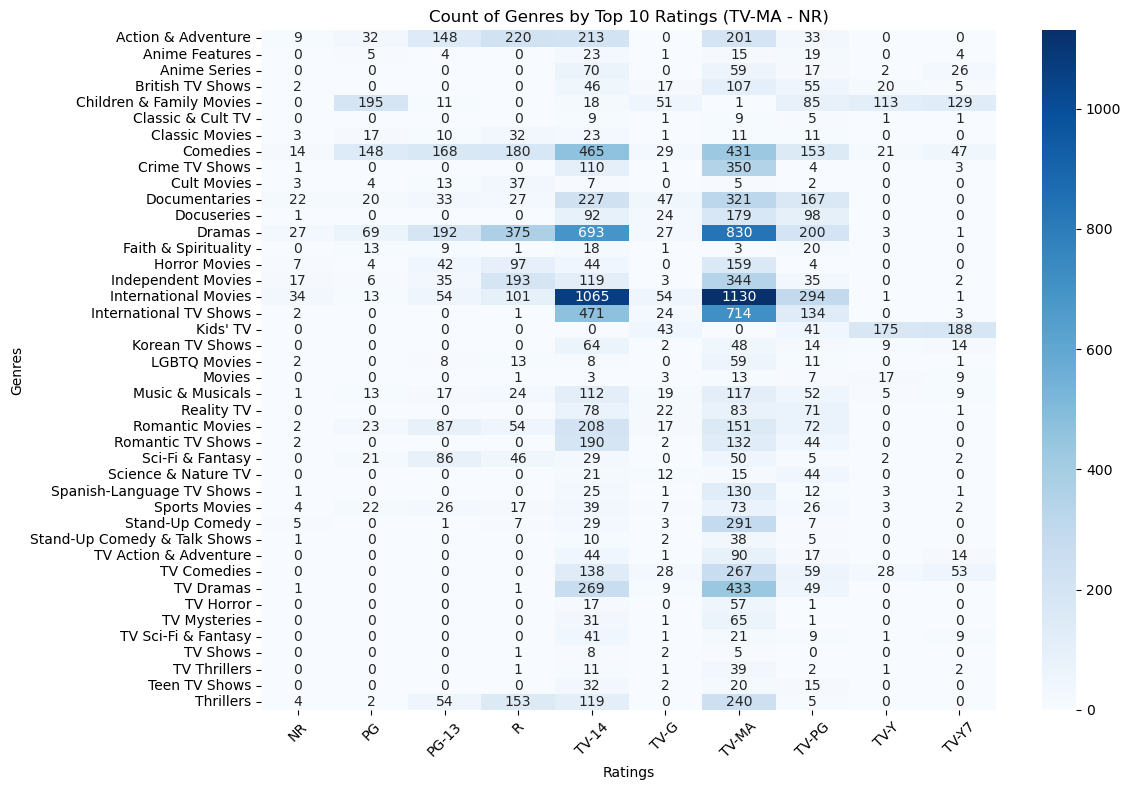

In [24]:
top_n = 10
top_n_ratings = df_exploded['rating'].value_counts(normalize=False).nlargest(top_n).index.tolist()

rating_genre = df_exploded[df_exploded['rating'].isin(top_n_ratings)].pivot_table(
    index='genre', columns='rating', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(rating_genre, annot=True, fmt='d', cmap='Blues', vmin=0, vmax=rating_genre.max().max())
plt.title('Count of Genres by Top {} Ratings ({} - {})'.format(top_n, top_n_ratings[0], top_n_ratings[-1]))
plt.ylabel('Genres')
plt.xlabel('Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The provided graph offers **insights** into the distribution of film and TV show genres across various rating categories.

- **Genre Dominance**: Drama and comedy genres emerge as the most prevalent, indicating a strong preference among viewers.
- **Rating Distribution**: Most content falls under the PG-13 and TV-14 ratings, suggesting a focus on teenage and adult audiences. The vast majority of content is produced with a "TV-MA" rating (classified by the TV Parental Guidelines to television programs intended solely for mature audiences).
- **Genre-Rating Correlation**: Certain genres, such as horror and thrillers, are more frequently associated with higher ratings (R or TV-PG), aligning with their thematic content.

***Сorrelation between the year of content release and the content added to the platform***

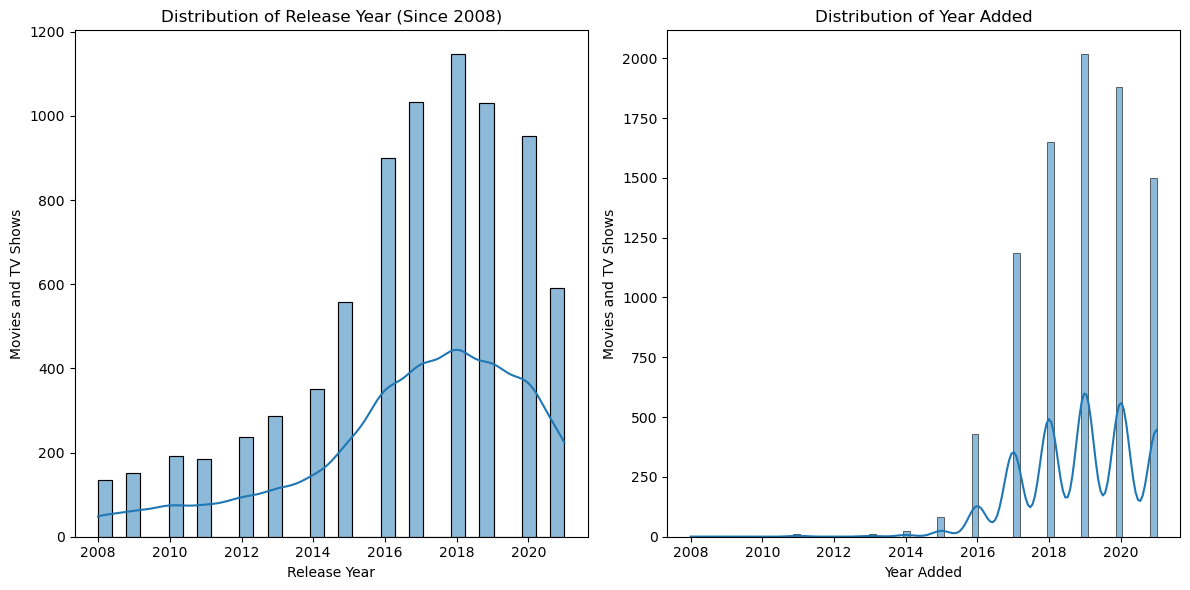

In [18]:
min_release_year = 2008

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['release_year'] >= min_release_year], x='release_year', kde=True)
plt.title(f'Distribution of Release Year (Since {min_release_year})')
plt.xlabel('Release Year')
plt.ylabel('Movies and TV Shows')

plt.subplot(1, 2, 2)
sns.histplot(df['year_added'], kde=True)
plt.title('Distribution of Year Added')
plt.xlabel('Year Added')
plt.ylabel('Movies and TV Shows')


plt.tight_layout()
plt.show()

***The most common words in the description***

From these combined graphs we can see the **following insights**:
- The number of movies and TV shows added to the platform has increased significantly since 2016, with a peak in 2019.
- A reduction in production and content additions on the platform due to the Covid pandemic since 2020
- There is a clear correlation between the year a content was added to the platform and its release year, suggesting a focus on more recent content.

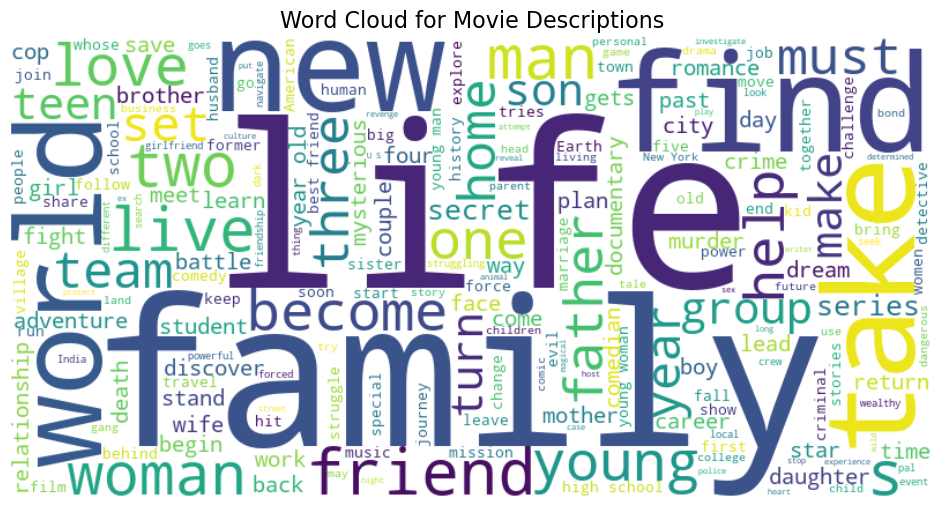

In [8]:
all_descriptions = " ".join(df['description'])

stop_words = set(stopwords.words('english'))
filtered_words = " ".join(word for word in all_descriptions.split() if word.lower() not in stop_words)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(filtered_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Movie Descriptions", fontsize=16)
plt.show()

Based on the word cloud, we can infer the following about the movies in the dataset:

- **Common themes**: The movies often revolve around themes of family, love, and personal journeys. Terms like "family," "love," "journey," "life," and "dream" are prominent.
- **Character types**: There's a strong focus on female characters, as indicated by words like "woman," "girl," and "mother." Additionally, there are many references to relationships, particularly romantic ones, as shown by terms like "love," "husband," and "wife."
- **Story structures**: The movies seem to follow common narrative structures involving journeys, challenges, and transformations. Words such as "start," "journey," "change," and "end" support this.
- **Settings**: The movies are set in a variety of locations, including cities, rural areas, and even different countries. Terms like "city," "country," and "India" indicate this diversity.
  
In essence, the word cloud suggests that the dataset primarily consists of movies that explore personal relationships, journeys of self-discovery, and coming-of-age stories.